# Transforming Continuous Values to Discrete Events

The role of the trigger function in the conviction voting algorithm is to determine if a sufficient amount of conviction has accumulated in support of a particular proposal. In the 1hive use case for conviction, proposals map to precise quantities of resources $r$ requested from a communal resource pool $R$ (which is time varying $R_t$ but we will drop the subscript for ease of reading). Further more there is a supply of governance tokens $S$ which are being used as part of the goverance process.  In the implementation the quantity $S$ will be the effective supply which is the subset of the total Supply for the governance token in question. We assume a time varying supply $S_t$ and thereforewe can interpret $S_t$ as the effective supply without loss of generality. Furthermore we drop the subscript and refer to $S$ for ease of reading. The process of passing a proposal results in an allocation of $r$ funds as shown in the figure below.

![](images/stockflow_cv_trigger.png)

The trigger function is characterized by a set of parameters in addition to the current state of the system: $R$ and $S$. Those parameters are $\alpha$, $\beta$ and $\rho$.

$\alpha \in (0,1)$ is the conviction rate parameter defined in [LINK TO Deriving Alpha] and should be tuned according to a desired half life.

$\beta\in (0,1)$ is the assymptotic limit for trigger function. It is impossible to discharge more $\beta$ share of funds. 

$\rho \in (0, \beta^2)$ is a the scale factor for trigger function. Note that we require $0<\rho <\beta^2$  

The trigger function:

$y^*(r) = y^*(r) = \frac{\rho S}{(1-\alpha)\left(\beta^2 - \frac{r}{R}\right) }$

The geometric properties of this function with respect to the parameter choices are shown here:

![](images/trigger_geometry.png)

Note that by requiring that: $0<\rho <\beta^2$ the following holds $0<\frac{\rho}{\beta^2}<1$ and $0<\beta - \sqrt \rho <\beta <1$

In [ ]:
x


In [5]:
import warnings
warnings.filterwarnings("ignore")

from cadCAD.configuration.utils import config_sim
from model.parts.utils import *
from model.parts.sys_params import * 

sim_config = config_sim({
    'N': 1,
    'T': range(100), #day 
    'M': params,
})

In [6]:
supply = initial_values['supply']
alpha = sim_config[0]['M']['alpha']

mcv = supply/(1-alpha)
print('for reference: max conviction = '+str(np.log10(mcv))+'in log10 units')

for reference: max conviction = 5.035599031662158in log10 units


In [7]:
supply_sweep = trigger_sweep('effective_supply',trigger_threshold, sim_config[0]['M'], supply)
alpha_sweep = trigger_sweep('alpha',trigger_threshold, sim_config[0]['M'], supply)

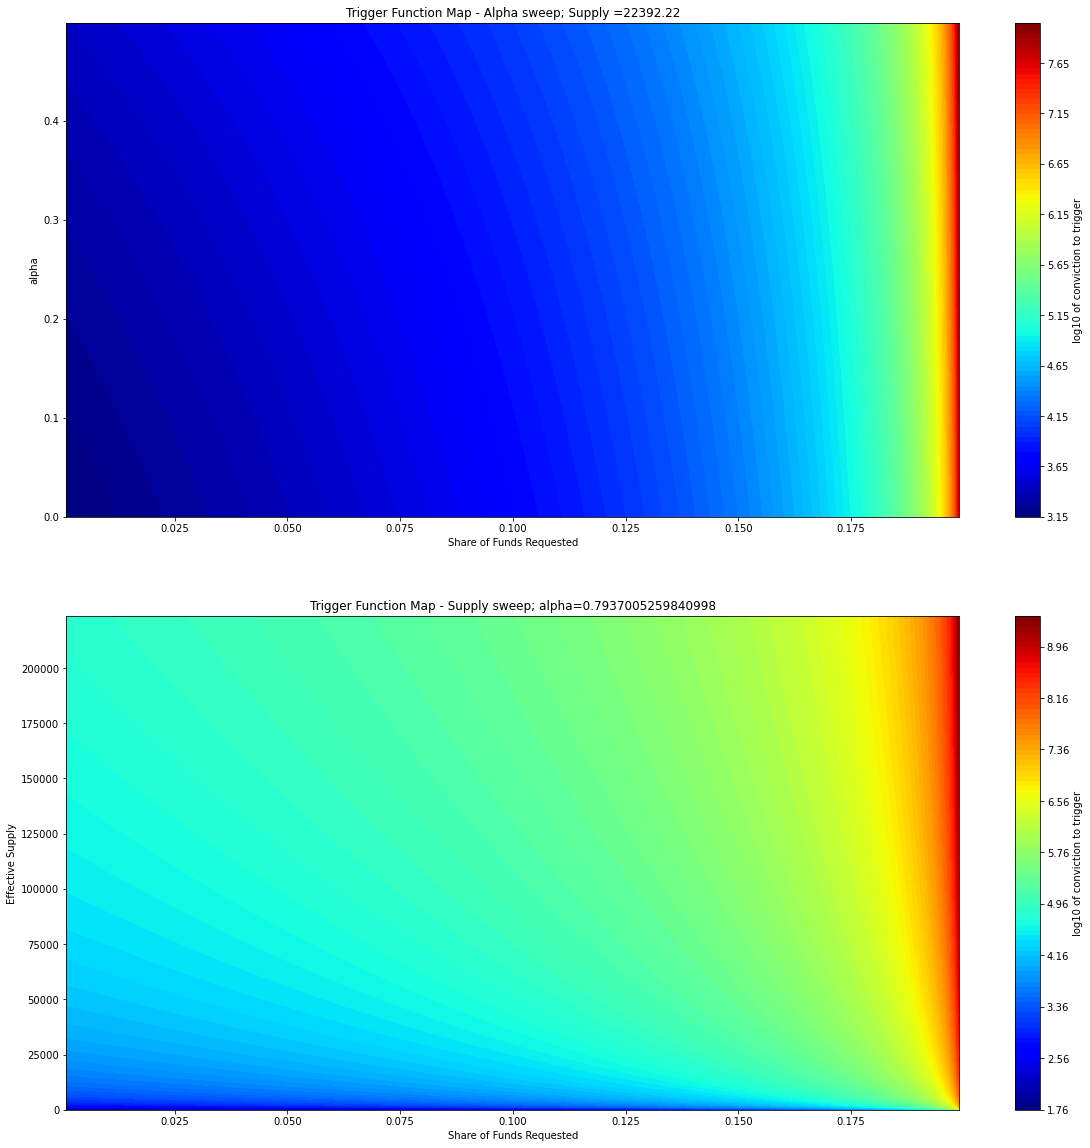

In [8]:
trigger_grid(supply_sweep, alpha_sweep)

These plots demonstrate the increasing conviction required to pass a proposal when either % of funds requested, effective supply, or alpha parameter is high. Blue areas represent lower required conviction, and red areas represent impossibly high conviction. This ensures that the reserve pool of funds are not depleted by a small number of large proposals.
